In [1]:
import numpy as np
from utils01 import GROParser
from utils01 import ReadXVGs


%matplotlib inline
import matplotlib.pyplot as plt

# read gro

In [2]:
groparser = GROParser("input/solv_ions_prot.gro", 1.0)

ARRANGED_INDECES = groparser.arranged_indeces
SLICE_INDECES = groparser.slice_indeces

REARRANGED_INDECES = groparser.rearranged_indeces

# read trj

In [3]:
# fp = "input/xvg/2fs-large/MainChain-coord.xvg"
# arr = ReadXVGs(0, None, None)._read_xvg(fp).compute()

# fp = "remote-workspace/fitting/2fs.npy"
fp = "remote-workspace/fitting/run1.npy"
arr = np.load(fp)
arr = arr[:, ARRANGED_INDECES, :]

arr.shape

(300000, 1235, 3)

# RMSF

In [4]:
def calu_rmsf(trj):
#     ref = trj.mean(axis=0)
    ref = trj[0]

    return np.sqrt(np.mean(np.sum(np.square(trj - ref), axis=2), axis=0))


In [5]:
l, u = SLICE_INDECES['CA']
act_rmsf = calu_rmsf(arr[:, l:u, :])
act_rmsf.shape

(309,)

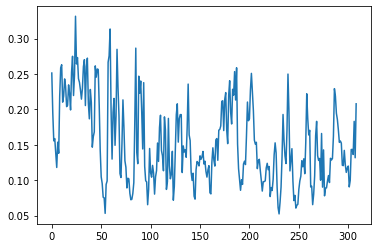

In [6]:
plt.plot(act_rmsf)

In [7]:
np.argmax(act_rmsf)

24

## all RMSF check

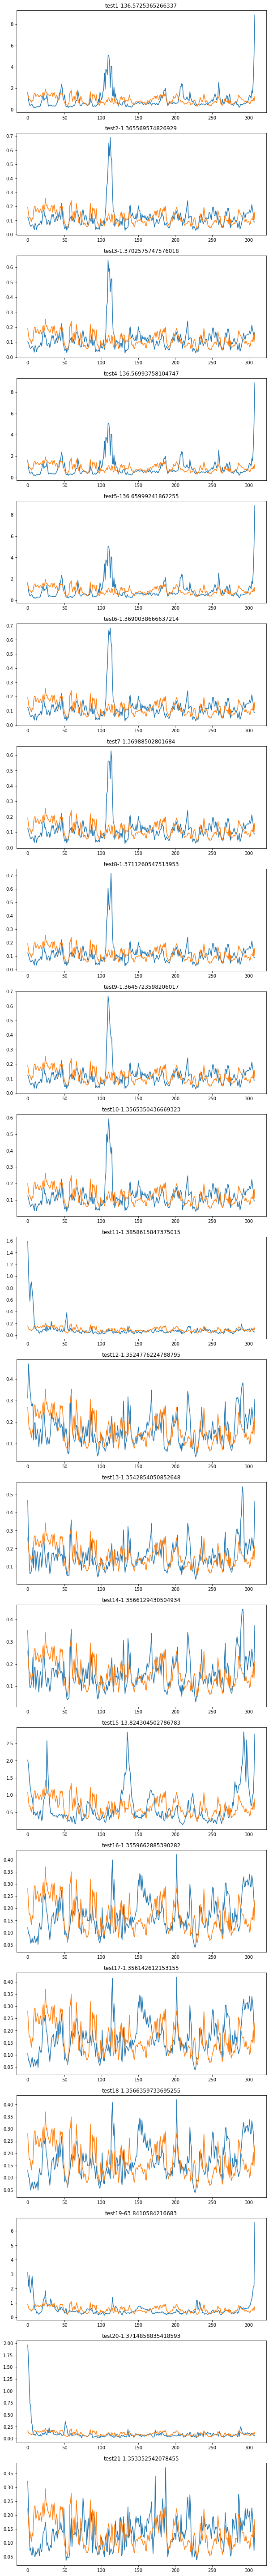

In [8]:
N = 21
fig = plt.figure(figsize=(10, 5*N))
for i in range(1, N+1):
    ax = fig.add_subplot(N, 1, i)
    fp = f"remote-workspace/04-simulate/test{i}.npy"
    arr = np.load(fp)[:, ARRANGED_INDECES, :]
    T = np.sum(np.square(arr[1:] - arr[:-1]))
    ax.set_title(f"test{i}-{T}")
    rmsf = calu_rmsf(arr[:, l:u, :])
    ax.plot(rmsf)
    
    ax.plot(act_rmsf*(np.mean(rmsf)/np.mean(act_rmsf)))

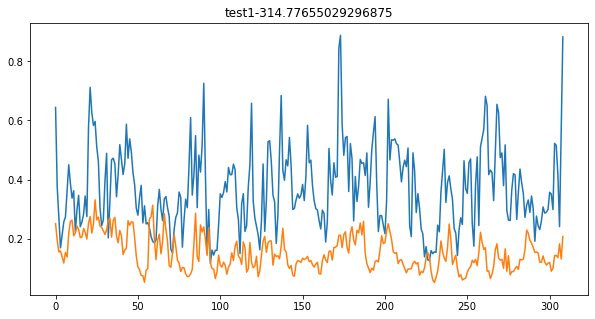

In [9]:
N = 1
fig = plt.figure(figsize=(10, 5*N))
for i in range(1, N+1):
    ax = fig.add_subplot(N, 1, i)
    fp = "remote-workspace/fitting/test23.npy"
    arr = np.load(fp)[:, ARRANGED_INDECES, :]
    T = np.sum(np.square(arr[1:] - arr[:-1]))
    ax.set_title(f"test{i}-{T}")
    rmsf = calu_rmsf(arr[:, l:u, :])
    ax.plot(rmsf)
    
#     ax.plot(act_rmsf*(np.mean(rmsf)/np.mean(act_rmsf)))
    ax.plot(act_rmsf)

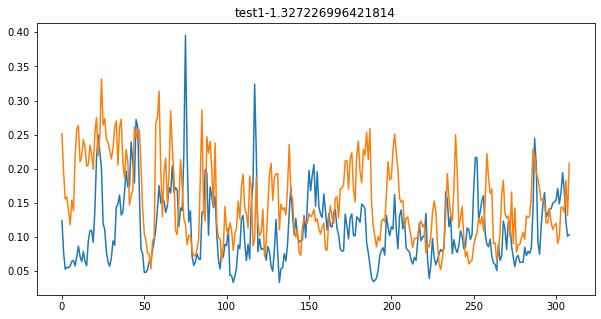

In [10]:
N = 1
fig = plt.figure(figsize=(10, 5*N))
for i in range(1, N+1):
    ax = fig.add_subplot(N, 1, i)
    fp = "remote-workspace/fitting/test24.npy"
    arr = np.load(fp)[:, ARRANGED_INDECES, :]
    T = np.sum(np.square(arr[1:] - arr[:-1]))
    ax.set_title(f"test{i}-{T}")
    rmsf = calu_rmsf(arr[:, l:u, :])
    ax.plot(rmsf)
    
#     ax.plot(act_rmsf*(np.mean(rmsf)/np.mean(act_rmsf)))
    ax.plot(act_rmsf)

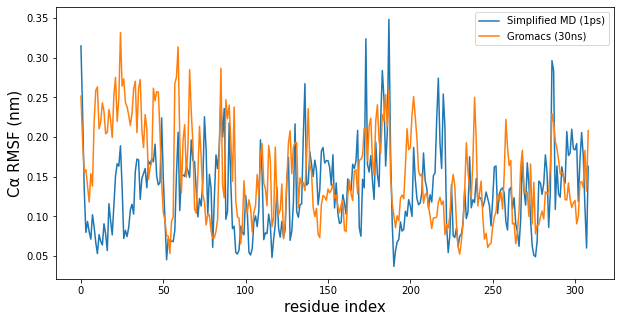

In [33]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(N, 1, i)
fp = "remote-workspace/fitting/test25.npy"
arr = np.load(fp)[:, ARRANGED_INDECES, :]
T = np.sum(np.square(arr[1:] - arr[:-1]))
rmsf = calu_rmsf(arr[:, l:u, :])

ax.plot(rmsf, label="Simplified MD (1ps)")
ax.plot(act_rmsf, label="Gromacs (30ns)")

ax.set_xlabel("residue index", fontsize=15)
ax.set_ylabel(u'C\u03b1 RMSF (nm)', fontsize=15)
ax.legend()

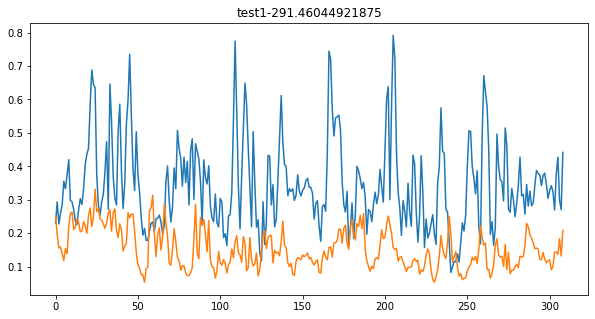

In [12]:
N = 1
fig = plt.figure(figsize=(10, 5*N))
for i in range(1, N+1):
    ax = fig.add_subplot(N, 1, i)
    fp = "remote-workspace/fitting/test26.npy"
    arr = np.load(fp)[:, ARRANGED_INDECES, :]
    T = np.sum(np.square(arr[1:] - arr[:-1]))
    ax.set_title(f"test{i}-{T}")
    rmsf = calu_rmsf(arr[:, l:u, :])
    ax.plot(rmsf)
    
#     ax.plot(act_rmsf*(np.mean(rmsf)/np.mean(act_rmsf)))
    ax.plot(act_rmsf)